<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Daily_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Types de Classification

Classification Binaire :
Deux classes possibles (0 ou 1)
Exemple : Vrai/Faux, Positif/Négatif

Classification Multi-classes :
Plus de deux classes distinctes
Exemple : Classification de chiffres (0-9)

Classification Multi-étiquettes :
Plusieurs étiquettes simultanées possibles
Exemple : Catégories d'un article

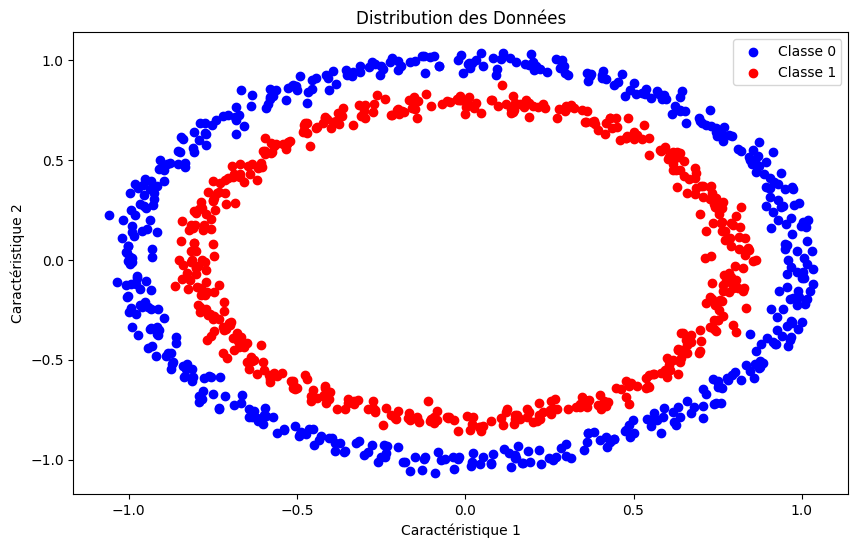

In [1]:
# 2. Préparation des Données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

# Création du jeu de données
nb_echantillons = 1000
X, y = make_circles(nb_echantillons,
                   noise=0.03,
                   random_state=42)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Classe 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Classe 1')
plt.title('Distribution des Données')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.show()


In [5]:
# 3. Modèle neural simple
def creer_modele_base():
    modele = tf.keras.Sequential([
        # Création d'une couche d'entrée explicite
        tf.keras.layers.Input(shape=(2,)),
        # Couche Dense avec activation sigmoid
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    modele.compile(
        optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return modele

# Entraînement modèle simple
modele_base = creer_modele_base()
hist_base = modele_base.fit(X, y, epochs=100, verbose=0)



In [4]:
# 4. Modèle amélioré
def creer_modele_avance():
    modele = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    modele.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return modele

modele_avance = creer_modele_avance()
hist_avance = modele_avance.fit(X, y, epochs=100, verbose=0)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


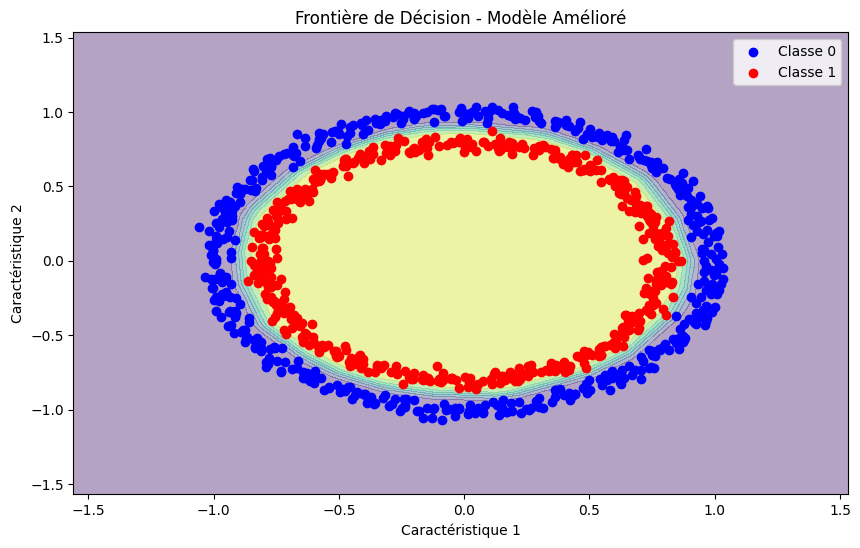

In [6]:
# 5. Visualisation des Frontières de décision
def afficher_frontiere_decision(modele, X, y, titre=""):
    # Création grille
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Prédictions
    Z = modele.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Affichage
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Classe 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Classe 1')
    plt.title(f'Frontière de Décision - {titre}')
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.legend()
    plt.show()

afficher_frontiere_decision(modele_avance, X, y, "Modèle Amélioré")


In [7]:
# 6-7. Division et Evaluation des données
from sklearn.model_selection import train_test_split

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Entraînement final
modele_final = creer_modele_avance()
hist_final = modele_final.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=0
)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0572 
Précision sur données de test : 1.0000


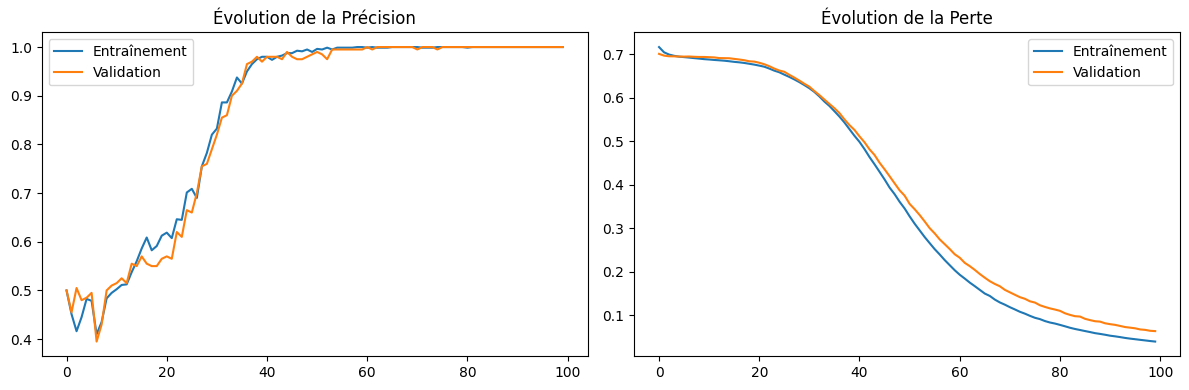

In [8]:
# 8. Evaluation des performances
# Évaluation
evaluation = modele_final.evaluate(X_test, y_test)
print(f"Précision sur données de test : {evaluation[1]:.4f}")

# Visualisation de l'apprentissage
plt.figure(figsize=(12, 4))

# Graphique précision
plt.subplot(1, 2, 1)
plt.plot(hist_final.history['accuracy'], label='Entraînement')
plt.plot(hist_final.history['val_accuracy'], label='Validation')
plt.title('Évolution de la Précision')
plt.legend()

# Graphique perte
plt.subplot(1, 2, 2)
plt.plot(hist_final.history['loss'], label='Entraînement')
plt.plot(hist_final.history['val_loss'], label='Validation')
plt.title('Évolution de la Perte')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Matrice de Confusion:
[[100   0]
 [  0 100]]

Rapport de Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



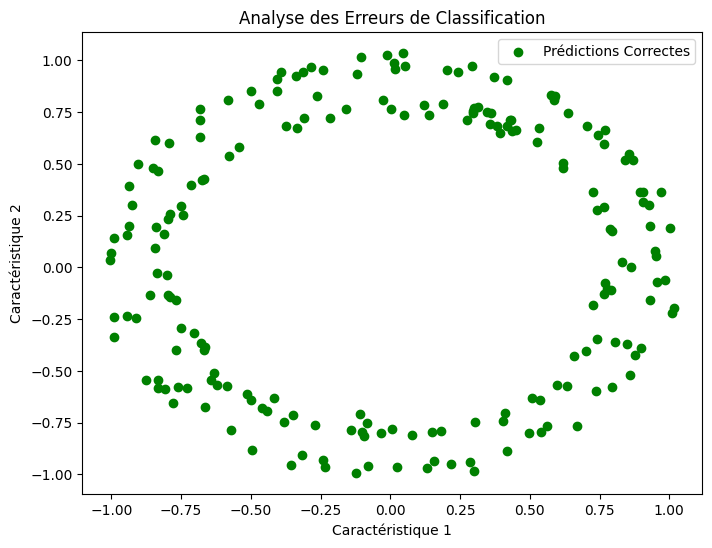


Comparaison des Performances:
Modèle de Base - Précision: 0.4450
Modèle Final - Précision: 1.0000
Amélioration: 55.50%


In [11]:
# 8.1. Comparaison des performances
from sklearn.metrics import confusion_matrix, classification_report

def evaluer_et_visualiser_performances(modele, X_train, X_test, y_train, y_test, historique):
    """
    Évalue et visualise les performances complètes du modèle
    """

    # Matrice de confusion et rapport de classification
    y_pred = (modele.predict(X_test) > 0.5).astype(int)
    y_test_1d = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

    print("\nMatrice de Confusion:")
    print(confusion_matrix(y_test_1d, y_pred))

    print("\nRapport de Classification:")
    print(classification_report(y_test_1d, y_pred))

    # Analyse des erreurs
    mask_erreurs = y_test_1d != y_pred.flatten()

    plt.figure(figsize=(8, 6))
    # Points correctement classés
    plt.scatter(X_test[~mask_erreurs][:, 0],
               X_test[~mask_erreurs][:, 1],
               c='green', label='Prédictions Correctes')
    # Points mal classés
    if np.any(mask_erreurs):  # Vérifie s'il y a des erreurs
        plt.scatter(X_test[mask_erreurs][:, 0],
                   X_test[mask_erreurs][:, 1],
                   c='red', marker='x', s=100, label='Erreurs')
    plt.title('Analyse des Erreurs de Classification')
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.legend()
    plt.show()

# Utilisation de la fonction
evaluer_et_visualiser_performances(modele_final,
                                 X_train, X_test,
                                 y_train, y_test,
                                 hist_final)

# Résumé des améliorations
def comparer_modeles(modele_base, modele_final, X_test, y_test):
    perf_base = modele_base.evaluate(X_test, y_test, verbose=0)
    perf_final = modele_final.evaluate(X_test, y_test, verbose=0)

    print("\nComparaison des Performances:")
    print(f"Modèle de Base - Précision: {perf_base[1]:.4f}")
    print(f"Modèle Final - Précision: {perf_final[1]:.4f}")
    print(f"Amélioration: {(perf_final[1] - perf_base[1])*100:.2f}%")

# Comparaison finale
comparer_modeles(modele_base, modele_final, X_test, y_test)


# 9. Résumé des Points Clés en Classification Deep Learning

## 1. Fondamentaux de la Visualisation
- Comprendre la distribution des données est crucial
- La visualisation aide à détecter les anomalies
- Permet de choisir la meilleure architecture

## 2. Hyperparamètres Essentiels
- Taille des lots (batch size)
- Taux d'apprentissage
- Nombre de couches
- Choix des fonctions d'activation

## 3. Structure du Modèle
- Privilégier la simplicité quand c'est possible
- Justifier chaque ajout de complexité
- Équilibrer performance et complexité

## 4. Évaluation des Performances
- Diversifier les métriques d'évaluation
- Ne pas se fier uniquement à la précision
- Considérer le contexte d'utilisation

## 5. Méthodologie
- Séparation correcte train/test
- Importance de la validation croisée
- Suivi régulier de l'apprentissage
- Documentation des expériences

## 6. Conseils Pratiques
- Commencer simple et complexifier si nécessaire
- Documenter les changements et leurs impacts
- Maintenir une approche systématique

## 7. Points de Vigilance
- Éviter le surapprentissage
- Équilibrer les données
- Valider sur des données réelles

## 8. Recommandations
1. Tester différentes architectures
2. Établir des métriques claires
3. Documenter les résultats
4. Itérer sur les améliorations
